In [5]:
#!pip install --upgrade category_encoders

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import category_encoders as ce
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline, make_pipeline
from category_encoders import OneHotEncoder
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact
from sklearn.impute import SimpleImputer

from sklearn.utils.validation import check_is_fitted

In [7]:
df = pd.read_csv("/content/train_data.csv")
df_shape = print(df.shape)
df.head(10)

(8523, 12)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [8]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
#findinf the NaN number
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Exploratory Data Analysis

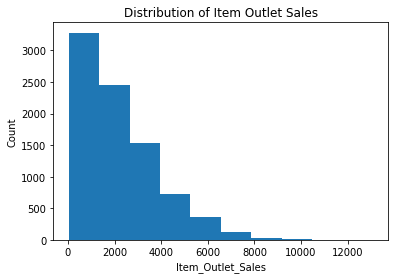

In [11]:
plt.hist(df['Item_Outlet_Sales'])
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Count")
plt.title("Distribution of Item Outlet Sales");

We can see that the Outlet_sales is normally distributed with right skewness.

In [12]:
size = df.groupby("Outlet_Size").count().reset_index()
fig = px.bar(size,x = "Outlet_Size", y = "Item_Outlet_Sales")
fig.show()

In [13]:
location = df.groupby("Outlet_Location_Type").count().reset_index()
fig = px.bar(location,x = "Outlet_Location_Type", y = "Item_Outlet_Sales")
fig.show();

In [14]:
Type = df.groupby("Outlet_Type").count().reset_index()
fig = px.bar(Type,x = "Outlet_Type", y = "Item_Outlet_Sales")
fig.show();

## Feature Engineering

In [15]:
#Filling the NA values with the mean
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight']).mean()

In [16]:
#Filling the NAN values with the hightest outlet size
df['Outlet_Size']=df['Outlet_Size'].fillna('Medium')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


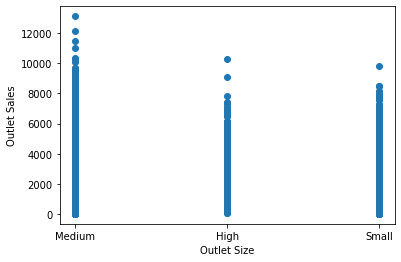

In [18]:
plt.scatter(df.Outlet_Size, df.Item_Outlet_Sales)
plt.xlabel('Outlet Size')
plt.ylabel('Outlet Sales')
plt.show()

In [19]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,NaN,NaN,NaN,NaN,NaN
Item_Visibility,NaN,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,NaN,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,NaN,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,NaN,-0.128625,0.567574,-0.049135,1.000000


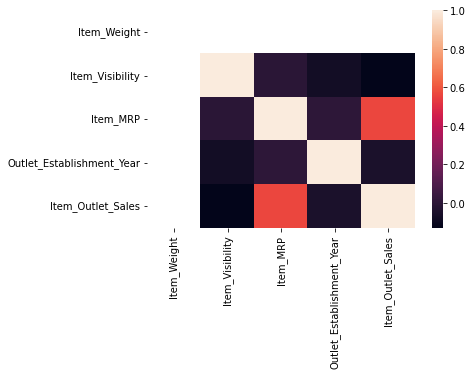

In [20]:
import seaborn as sns
sns.heatmap(df.corr())

Drop Multicollinearity

In [21]:
features = ["Item_Identifier","Item_Type","Item_MRP","Outlet_Identifier","Outlet_Establishment_Year", "Outlet_Size","Outlet_Location_Type","Item_Visibility","Outlet_Type","Item_Weight","Item_Fat_Content"]
X_train = df[features]
X_train.shape

(8523, 11)

In [22]:
target = "Item_Outlet_Sales"
y_train = df[target]
y_train.shape

(8523,)

Build Model

In [23]:
y_mean = y_train.mean()
y_mean

2181.288913575032

In [24]:
y_pred_baseline = [y_mean] * len(y_train)
y_pred_baseline[:5]

[2181.288913575032,
 2181.288913575032,
 2181.288913575032,
 2181.288913575032,
 2181.288913575032]

In [25]:
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print("Mean apt price", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean apt price 2181.29
Baseline MAE: 1346.57


In [26]:
ohe = OneHotEncoder(use_cat_names=True)
#Fit
ohe.fit(X_train)
#Transform
XT_train = ohe.transform(X_train)
print(XT_train.shape)
XT_train.head()

(8523, 1604)


,Item_Identifier_FDA15,Item_Identifier_DRC01,Item_Identifier_FDN15,Item_Identifier_FDX07,Item_Identifier_NCD19,Item_Identifier_FDP36,Item_Identifier_FDO10,Item_Identifier_FDP10,Item_Identifier_FDH17,Item_Identifier_FDU28,...,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type3,Item_Weight,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_LF,Item_Fat_Content_reg
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,12.857645,1,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,12.857645,0,1,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,12.857645,1,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,12.857645,0,1,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,12.857645,1,0,0,0,0


In [27]:
#set model
model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    LinearRegression()
)

In [28]:
#fit model
model.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Item_Identifier', 'Item_Type',
                                     'Outlet_Identifier', 'Outlet_Size',
                                     'Outlet_Location_Type', 'Outlet_Type',
                                     'Item_Fat_Content'],
                               use_cat_names=True)),
                ('simpleimputer', SimpleImputer()),
                ('linearregression', LinearRegression())])

In [29]:
y_pred_training=model.predict(X_train)

In [30]:
y_pred_training

array([5351.96875 ,  372.171875, 1935.96875 , ..., 1148.9375  ,
       1779.65625 , 1277.28125 ])

In [31]:
# Check your work
assert (
    len(y_pred_training) == 8523
), f"There should be 1343 predictions in `y_pred_training`, not {len(y_pred_training)}."

In [32]:
print("MEAN SQUARED ERROR(MSE)",mean_squared_error(y_train,y_pred_training))
print("MEAN ABSOLUTE ERROR(MAE)",mean_absolute_error(y_train,y_pred_training))
print("ROOT MEAN SQUARED ERROR(RMSE)",np.sqrt(mean_squared_error(y_train,y_pred_training)))

MEAN SQUARED ERROR(MSE) 1040952.2846310437
MEAN ABSOLUTE ERROR(MAE) 762.1435386923617
ROOT MEAN SQUARED ERROR(RMSE) 1020.2706918416523


In [33]:
intercept = model.named_steps["linearregression"].intercept_
coefficients = model.named_steps["linearregression"].coef_
feature_names = model.named_steps["onehotencoder"].get_feature_names()
feat_imp = pd.Series(coefficients, index=feature_names)
feat_imp

/usr/local/lib/python3.8/dist-packages/category_encoders/utils.py:360: FutureWarning:

`get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.



Item_Identifier_FDA15      -1.086091e+13
Item_Identifier_DRC01       2.066185e+12
Item_Identifier_FDN15       4.055208e+11
Item_Identifier_FDX07       3.927727e+11
Item_Identifier_NCD19       1.369684e+12
                                ...     
Item_Fat_Content_Low Fat    6.102808e+12
Item_Fat_Content_Regular    5.670011e+12
Item_Fat_Content_low fat    6.102808e+12
Item_Fat_Content_LF         6.102808e+12
Item_Fat_Content_reg        5.670011e+12
Length: 1604, dtype: float64

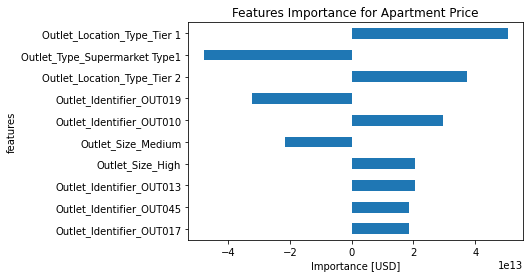

In [34]:
# Create horizontal bar chart
feat_imp.sort_values(key=abs).tail(10).plot(kind="barh")
plt.xlabel("Importance [USD]")
plt.ylabel("features")
plt.title("Features Importance for Apartment Price");

In [35]:
X_test= pd.read_csv("/content/test_data.csv")
X_test.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
5,FDH56,9.800,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1
6,FDL48,19.350,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2
7,FDC48,NaN,Low Fat,0.015782,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3
8,FDN33,6.305,Regular,0.123365,Snack Foods,95.7436,OUT045,2002,NaN,Tier 2,Supermarket Type1
9,FDA36,5.985,Low Fat,0.005698,Baking Goods,186.8924,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [36]:
X_test.shape

(5681, 11)

In [37]:
y_pred_test = pd.Series(model.predict(X_test))
y_pred_test.head()

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.




0    2.213351e+15
1    1.649133e+15
2    4.594072e+15
3    2.888608e+15
4    4.155078e+15
dtype: float64

In [38]:
y_pred_test


0       2.213351e+15
1       1.649133e+15
2       4.594072e+15
3       2.888608e+15
4       4.155078e+15
            ...     
5676    2.740497e+15
5677    3.144524e+15
5678    2.297092e+15
5679    4.123357e+15
5680    1.579307e+15
Length: 5681, dtype: float64

In [39]:
array = np.array(y_pred_test)

In [40]:
pred = array.astype(int)
pred

array([2213351325415439, 1649133161544115, 4594072217594048, ...,
       2297092019134515, 4123356921630903, 1579306653064062])

In [41]:
print(pred.dtype)

int64


In [42]:
features_names = model.named_steps["onehotencoder"].get_feature_names_out()
print("features len", len(features_names))
print(features_names[:5])

features len 1604
['Item_Identifier_FDA15', 'Item_Identifier_DRC01', 'Item_Identifier_FDN15', 'Item_Identifier_FDX07', 'Item_Identifier_NCD19']


In [44]:
submission = pd.read_csv("/content/sample_submission_8RXa3c6.csv")
submission.head(10)
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Item_Identifier    5681 non-null   object
 1   Outlet_Identifier  5681 non-null   object
 2   Item_Outlet_Sales  5681 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 133.3+ KB


In [45]:
submission["Item_Identifier"] = X_test["Item_Identifier"]
submission["Outlet_Identifier"] = X_test["Outlet_Identifier"]
submission["Item_Outlet_Sales"] = pred

In [46]:
submission

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,2213351325415439
1,FDW14,OUT017,1649133161544115
2,NCN55,OUT010,4594072217594048
3,FDQ58,OUT017,2888608203364291
4,FDY38,OUT027,4155078303190758
...,...,...,...
5676,FDB58,OUT046,2740497298281602
5677,FDD47,OUT018,3144523785879605
5678,NCO17,OUT045,2297092019134515
5679,FDJ26,OUT017,4123356921630903


In [71]:
import io
from io import StringIO

In [79]:
df_sales = pd.DataFrame(submission, columns=
             ["Item_Identifier","Outlet_Identifier","Item_Outlet_Sales"])
pd.read_csv(io.StringIO(df_sales.to_csv(index=False)))

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,2213351325415439
1,FDW14,OUT017,1649133161544115
2,NCN55,OUT010,4594072217594048
3,FDQ58,OUT017,2888608203364291
4,FDY38,OUT027,4155078303190758
...,...,...,...
5676,FDB58,OUT046,2740497298281602
5677,FDD47,OUT018,3144523785879605
5678,NCO17,OUT045,2297092019134515
5679,FDJ26,OUT017,4123356921630903


In [80]:
df_sales.to_csv("sales prediction.csv",index=False)

In [81]:
df_sales = pd.read_csv("/content/sales prediction.csv",index_col=False)
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Item_Identifier    5681 non-null   object
 1   Outlet_Identifier  5681 non-null   object
 2   Item_Outlet_Sales  5681 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 133.3+ KB
